In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout ,LSTM


mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape)

(60000, 28, 28)


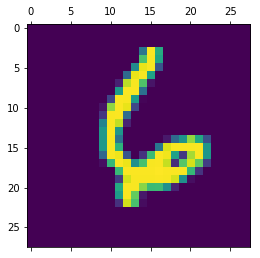

In [13]:
import matplotlib.pyplot as plt
plt.matshow(x_train[59000])
plt.show()

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0


model = Sequential()
model.add(LSTM(128,input_shape=x_train.shape[1:],activation = 'relu',return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

opt = tf.keras.optimizers.Adam(lr= 1e-3,decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy',optimizer = opt,metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=32,epochs = 3,validation_data = (x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.6855 - accuracy: 0.7930 - val_loss: 0.1568 - val_accuracy: 0.9544
Epoch 2/3
60000/60000 [==============================] - 151s 3ms/sample - loss: 0.1833 - accuracy: 0.9505 - val_loss: 0.0983 - val_accuracy: 0.9711
Epoch 3/3
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.1311 - accuracy: 0.9652 - val_loss: 0.0723 - val_accuracy: 0.9781


In [5]:
model.save('RNN-MNIST-32-3.h5')

In [10]:
#CuDNNLSTM - Without specyfying activation function CuDNNLSTM is automatically called.

model = Sequential()
model.add(LSTM(128,input_shape=x_train.shape[1:],return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(128))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

opt = tf.keras.optimizers.Adam(lr= 1e-3,decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy',optimizer = opt,metrics=['accuracy'])

model.fit(x_train,y_train,epochs = 3,validation_data = (x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 159s 3ms/sample - loss: 1.3020 - accuracy: 0.5195 - val_loss: 0.6390 - val_accuracy: 0.7785
Epoch 2/3
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.5016 - accuracy: 0.8402 - val_loss: 0.2560 - val_accuracy: 0.9165
Epoch 3/3
60000/60000 [==============================] - 142s 2ms/sample - loss: 0.2797 - accuracy: 0.9161 - val_loss: 0.1767 - val_accuracy: 0.9444


In [ ]:
model.save('RNN-MNIST-CuDNNLSTM-32-3.h5')